<a href="https://colab.research.google.com/github/Indongspace/Prophet_docs_study/blob/main/Prophet_docs_study(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prophet 공식문서 공부

In [1]:
# 폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 데이터부터 준비해보자

In [2]:
# 2017년
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df_2017 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2017for시계열.csv')
df_2017['피해액총합(천원)'] = df_2017['피해액총합(천원)'].str.replace(',','').astype(int)
df_2017

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2017-01-01,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13
1,2017-02-01,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17
2,2017-03-01,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24
3,2017-04-01,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22
4,2017-05-01,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18
5,2017-06-01,507,458,11,38,"45,101",926051,"317,749","608,302",21,4,17
6,2017-07-01,509,459,6,44,947,833273,"370,841","462,432",9,0,9
7,2017-08-01,480,433,6,41,"1,251",1061597,"402,834","658,763",24,0,24
8,2017-09-01,525,464,12,49,"1,389",1434617,"403,677","1,030,940",24,2,22
9,2017-10-01,488,437,14,37,"1,501",1239319,"588,466","650,853",25,2,23


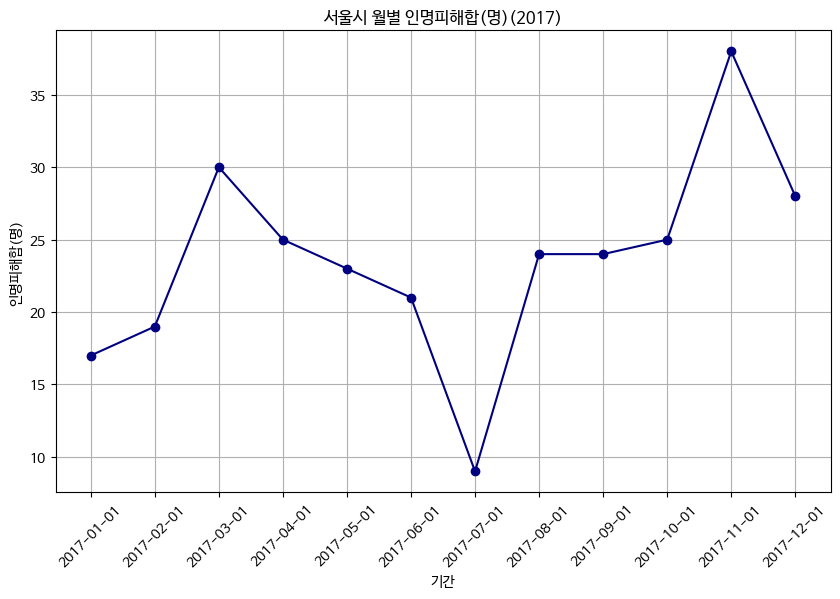

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2017['연도'],df_2017['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2017)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [4]:
# 2018
df_2018 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2018for시계열.csv')
df_2018['피해액총합(천원)'] = df_2018['피해액총합(천원)'].str.replace(',','').astype(int)
df_2018

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2018-01-01,651,572,18,61,"3,255",1920810,"663,100","1,257,710",57,15,42
1,2018-02-01,533,467,13,53,"4,593",1841395,"694,234","1,147,161",25,5,20
2,2018-03-01,511,454,25,32,"2,084",936411,"397,864","538,547",21,2,19
3,2018-04-01,528,463,12,53,"2,514",764546,"309,386","455,160",15,3,12
4,2018-05-01,508,450,21,37,"1,648",1264744,"533,462","731,282",42,4,38
5,2018-06-01,482,436,14,32,"1,652",710403,"245,533","464,870",41,3,38
6,2018-07-01,559,507,9,43,"1,137",790909,"324,034","466,875",17,1,16
7,2018-08-01,616,561,9,46,"1,041",1034940,"487,048","547,892",31,0,31
8,2018-09-01,479,426,7,46,"1,527",1359974,"461,721","898,253",27,4,23
9,2018-10-01,505,457,13,35,871,708518,"316,128","392,390",20,1,19


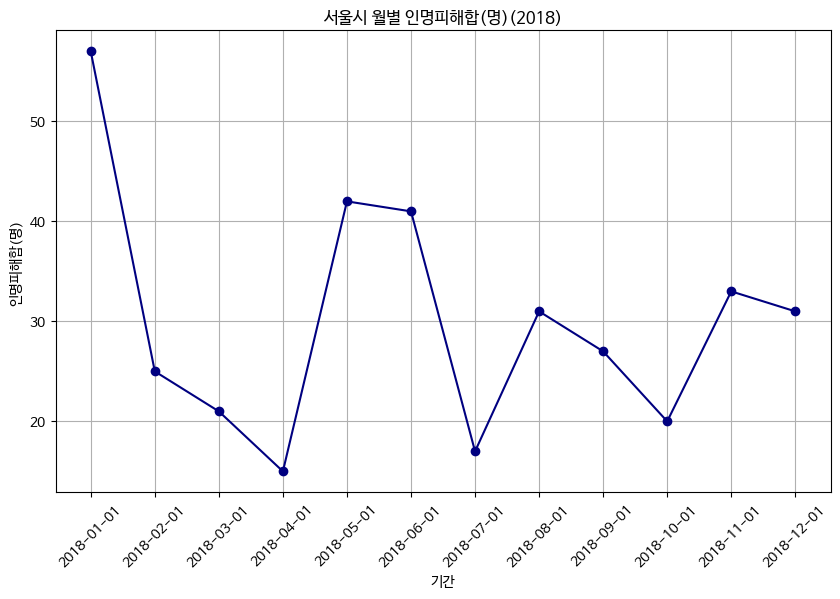

In [5]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2018['연도'],df_2018['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2018)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [6]:
# 2019
df_2019 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2019for시계열.csv')
df_2019['피해액총합(천원)'] = df_2019['피해액총합(천원)'].str.replace(',','').astype(int)
df_2019

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2019-01-01,600,529,19,52,"2,572",1766805,"580,112","1,186,693",42,4,38
1,2019-02-01,414,360,14,40,"1,485",1545133,"403,239","1,141,894",26,4,22
2,2019-03-01,501,448,11,42,"6,851",4829698,"1,613,428","3,216,270",28,2,26
3,2019-04-01,480,426,14,40,"3,761",1361459,"520,351","841,108",24,5,19
4,2019-05-01,590,532,11,47,"1,601",1045696,"443,880","601,816",34,8,26
5,2019-06-01,476,439,6,31,"3,301",1570098,"783,075","787,023",19,1,18
6,2019-07-01,511,464,5,42,"1,340",993023,"424,506","568,517",51,2,49
7,2019-08-01,491,446,12,33,"2,205",2200457,"871,658","1,328,799",32,2,30
8,2019-09-01,474,427,14,33,"3,941",72752701,"4,810,388","67,942,313",31,2,29
9,2019-10-01,441,384,13,44,"1,624",1621408,"580,803","1,040,605",36,3,33


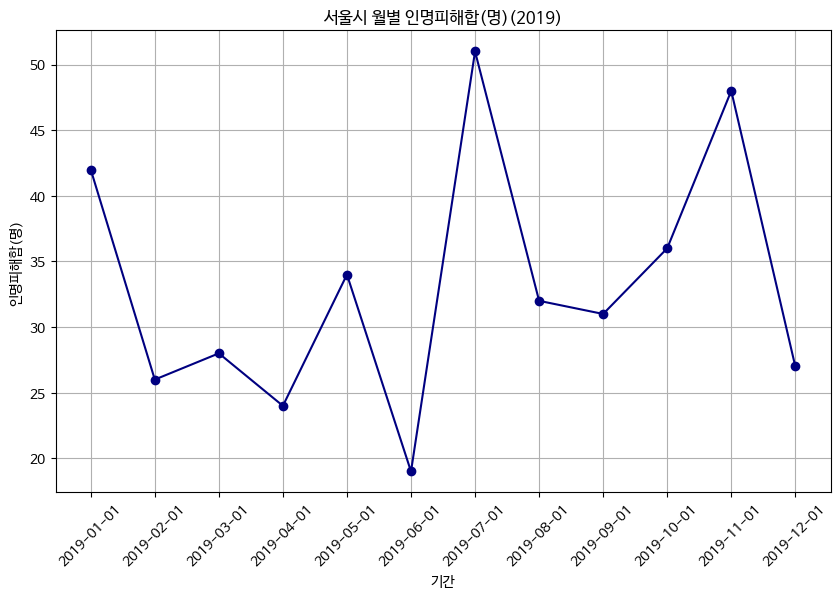

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2019['연도'],df_2019['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2019)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [8]:
# 2020
df_2020 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2020for시계열.csv')
df_2020['피해액총합(천원)'] = df_2020['피해액총합(천원)'].str.replace(',','').astype(int)
df_2020

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2020-01-01,409,367,11,31,"1,402",1551065,"948,835","602,230",35,4,31
1,2020-02-01,372,321,6,45,"1,397",1327803,"636,565","691,238",17,3,14
2,2020-03-01,444,398,9,37,"6,218",1453515,"510,638","942,877",24,4,20
3,2020-04-01,500,445,8,47,"1,968",1330540,"510,496","820,044",13,3,10
4,2020-05-01,426,376,6,44,"3,443",1072530,"515,484","557,046",17,4,13
5,2020-06-01,414,366,9,39,"1,249",1243802,"451,041","792,761",18,0,18
6,2020-07-01,382,345,3,34,"1,586",1089046,"476,897","612,149",17,0,17
7,2020-08-01,478,431,8,39,"1,457",893041,"408,841","484,200",20,1,19
8,2020-09-01,366,324,7,35,"1,912",3056718,"376,597","2,680,121",14,5,9
9,2020-10-01,432,388,12,32,"6,035",1682045,"1,064,044","618,001",21,4,17


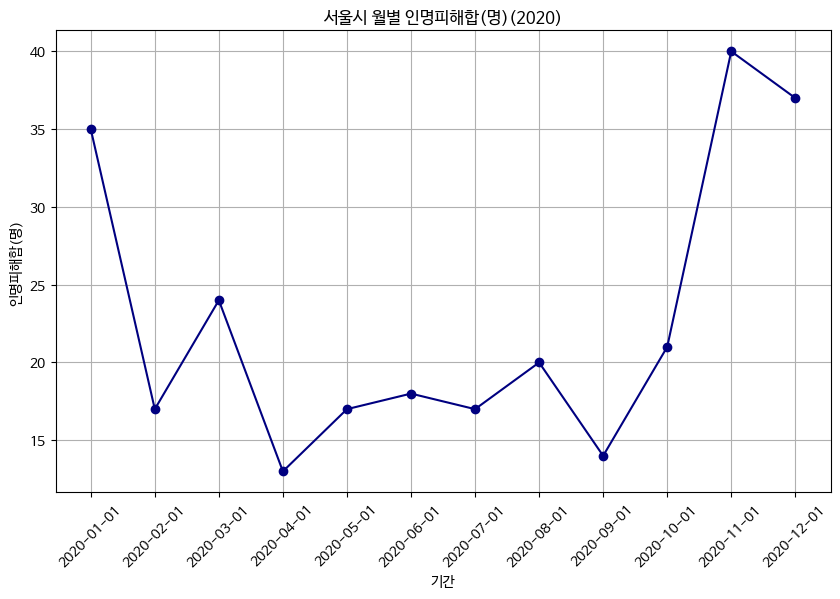

In [9]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2020['연도'],df_2020['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2020)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [10]:
# 2021
df_2021 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2021for시계열.csv')
df_2021['피해액총합(천원)'] = df_2021['피해액총합(천원)'].str.replace(',','').astype(int)
df_2021

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2021-01-01,521,465,10,46,"2,024",1719054,"802,144","916,910",33,6,27
1,2021-02-01,393,343,10,40,"2,685",2263899,"501,894","1,762,005",24,4,20
2,2021-03-01,433,372,11,50,"3,482",1219601,"581,442","638,159",35,2,33
3,2021-04-01,431,385,7,39,"1,150",734324,"347,402","386,922",12,0,12
4,2021-05-01,378,338,4,36,"1,420",1646823,"461,942","1,184,881",57,2,55
5,2021-06-01,349,309,8,32,"1,033",946369,"452,266","494,103",17,3,14
6,2021-07-01,478,433,7,38,"1,154",1243441,"476,476","766,965",18,3,15
7,2021-08-01,359,319,5,35,850,1483867,"670,360","813,507",26,4,22
8,2021-09-01,379,342,5,32,989,954762,"418,159","536,603",25,4,21
9,2021-10-01,388,342,7,39,"1,324",1358182,"428,998","929,184",32,2,30


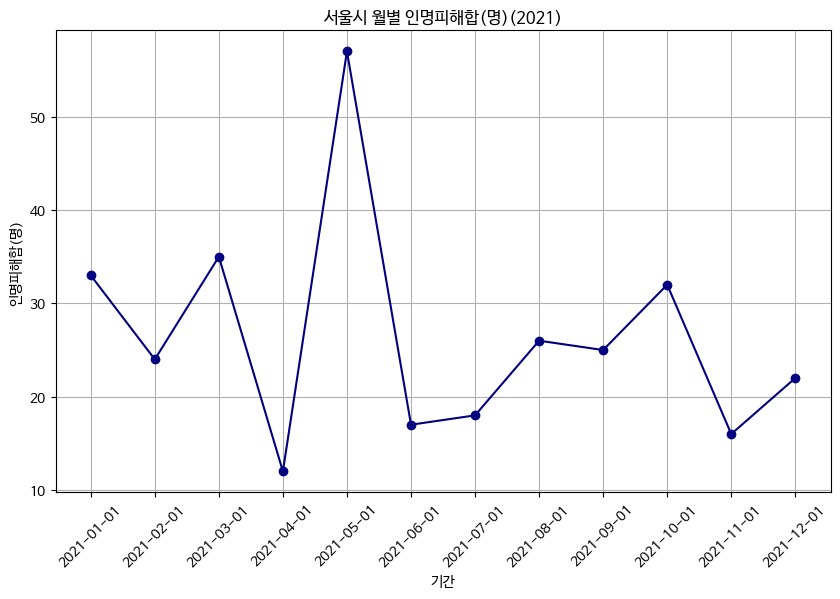

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2021['연도'],df_2021['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2021)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [12]:
# 2022
df_2022 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2022for시계열.csv')
df_2022['피해액총합(천원)'] = df_2022['피해액총합(천원)'].str.replace(',','').astype(int)
df_2022

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2022-01-01,448,389,10,49,"1,567",1398527,"628,838","769,689",43,6,37
1,2022-02-01,439,383,10,46,"7,800",1331847,"515,574","816,273",36,5,31
2,2022-03-01,407,348,15,44,"3,176",2122665,"761,520","1,361,145",18,4,14
3,2022-04-01,501,435,9,57,"3,932",2001040,"678,885","1,322,155",45,6,39
4,2022-05-01,531,472,14,45,"2,745",1260512,"594,564","665,948",33,3,30
5,2022-06-01,420,372,9,39,"2,798",907108,"423,530","483,578",17,1,16
6,2022-07-01,469,422,7,40,"1,470",1355779,"489,159","866,620",30,1,29
7,2022-08-01,432,390,2,40,922,1161249,"458,213","703,036",19,2,17
8,2022-09-01,416,373,8,35,"1,321",1188347,"462,555","725,792",22,0,22
9,2022-10-01,415,370,10,35,"1,012",771585,"325,443","446,142",25,4,21


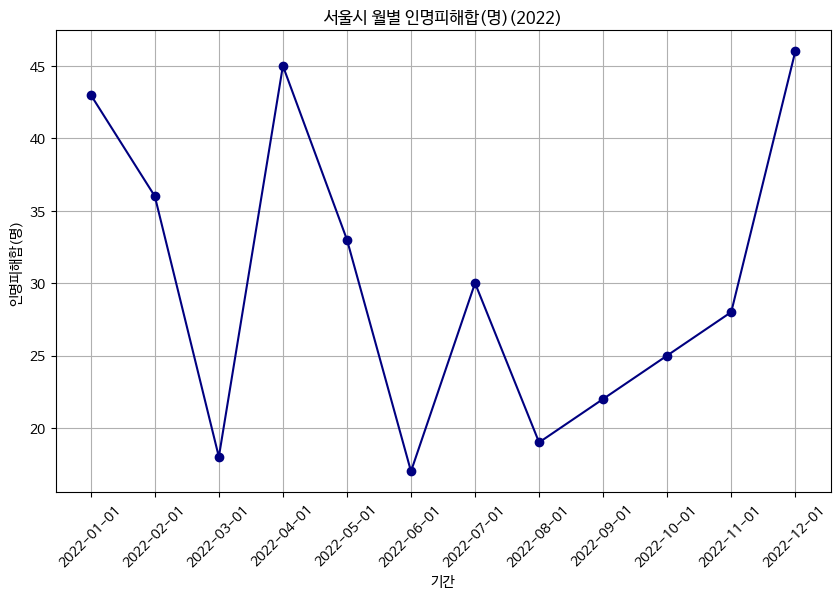

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2022['연도'],df_2022['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2022)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [14]:
# 2023
df_2023 = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스34/세미프로젝트(3.7~)/data/서울시 화재발생 현황 (2017~2022)/서울시_화재발생_현황(월별)2023for시계열.csv')
df_2023['피해액총합(천원)'] = df_2023['피해액총합(천원)'].str.replace(',','').astype(int)
df_2023

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2023-01-01,543,389,10,49,"1,567",2132169,"628,838","769,689",19,0,19
1,2023-02-01,494,383,10,46,"7,800",1014976,"515,574","816,273",22,4,18
2,2023-03-01,535,348,15,44,"3,176",2023208,"761,520","1,361,145",17,1,16
3,2023-04-01,451,435,9,57,"3,932",1424281,"678,885","1,322,155",24,3,21
4,2023-05-01,487,472,14,45,"2,745",1012309,"594,564","665,948",16,0,16
5,2023-06-01,439,372,9,39,"2,798",966739,"423,530","483,578",24,1,23
6,2023-07-01,461,422,7,40,"1,470",919022,"489,159","866,620",18,2,16
7,2023-08-01,450,390,2,40,922,1083718,"458,213","703,036",24,0,24
8,2023-09-01,427,373,8,35,"1,321",936333,"462,555","725,792",31,2,29
9,2023-10-01,418,370,10,35,"1,012",1189566,"325,443","446,142",24,2,22


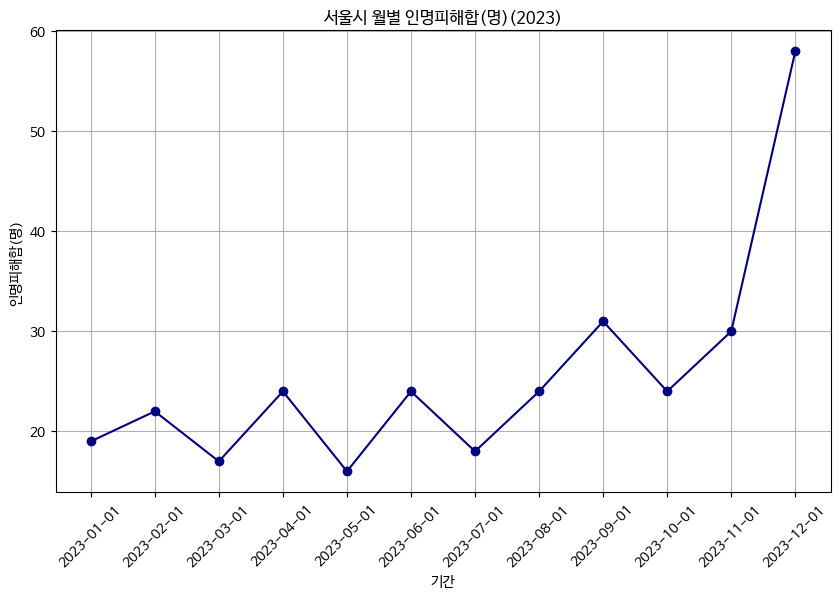

In [15]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(10,6))
plt.plot(df_2023['연도'],df_2023['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2023)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=45)
plt.gca().grid(True)
plt.show()

In [16]:
# 합치기
df = pd.concat([df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023],axis=0)
df.reset_index(drop=True,inplace=True)
df.head(15)

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2017-01-01,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13
1,2017-02-01,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17
2,2017-03-01,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24
3,2017-04-01,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22
4,2017-05-01,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18
5,2017-06-01,507,458,11,38,"45,101",926051,"317,749","608,302",21,4,17
6,2017-07-01,509,459,6,44,947,833273,"370,841","462,432",9,0,9
7,2017-08-01,480,433,6,41,"1,251",1061597,"402,834","658,763",24,0,24
8,2017-09-01,525,464,12,49,"1,389",1434617,"403,677","1,030,940",24,2,22
9,2017-10-01,488,437,14,37,"1,501",1239319,"588,466","650,853",25,2,23


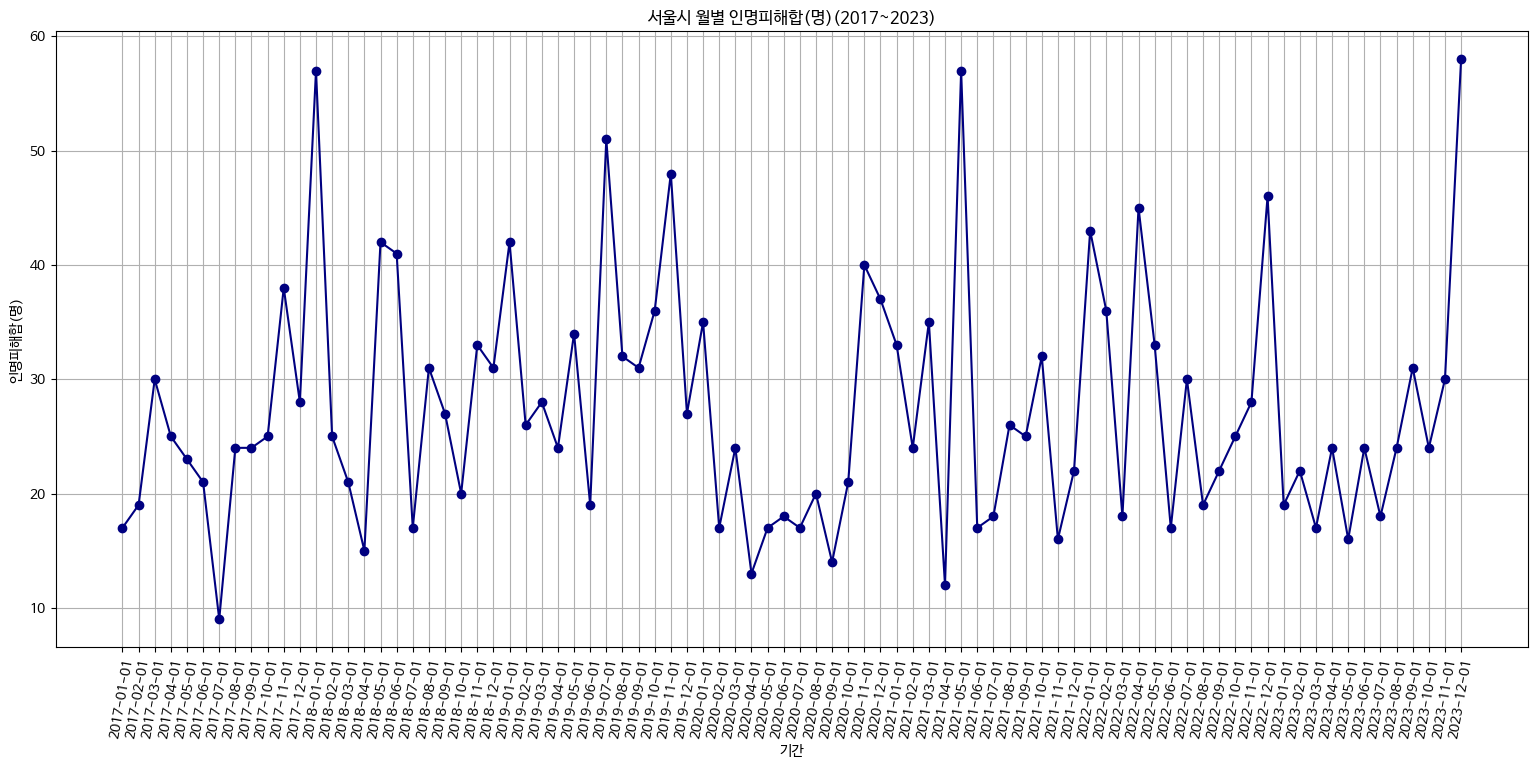

In [17]:
# 화재총합(건)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(19,8))
plt.plot(df['연도'],df['인명피해합(명)'],marker='o',color='navy',linestyle='-')

plt.title("서울시 월별 인명피해합(명)(2017~2023)")
plt.xlabel('기간')
plt.ylabel('인명피해합(명)')
plt.xticks(rotation=80)
plt.gca().grid(True)
plt.show()

In [18]:
df['연도'] = pd.to_datetime(df['연도'], format='%Y-%m')
df['연도']

0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
        ...    
79   2023-08-01
80   2023-09-01
81   2023-10-01
82   2023-11-01
83   2023-12-01
Name: 연도, Length: 84, dtype: datetime64[ns]

In [19]:
df['연도'] = df['연도'].dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)
df

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24
3,2017-04-30,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22
4,2017-05-31,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2023-08-31,450,390,2,40,922,1083718,"458,213","703,036",24,0,24
80,2023-09-30,427,373,8,35,"1,321",936333,"462,555","725,792",31,2,29
81,2023-10-31,418,370,10,35,"1,012",1189566,"325,443","446,142",24,2,22
82,2023-11-30,456,324,5,39,"4,498",2333341,"590,805","806,901",30,4,26


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   연도         84 non-null     datetime64[ns]
 1   화재총합(건)    84 non-null     int64         
 2   실화(건)      84 non-null     int64         
 3   방화(건)      84 non-null     int64         
 4   기타(건)      84 non-null     int64         
 5   소실면적(m²)   84 non-null     object        
 6   피해액총합(천원)  84 non-null     int64         
 7   부동산피해(천원)  84 non-null     object        
 8   동산피해(천원)   84 non-null     object        
 9   인명피해합(명)   84 non-null     int64         
 10  사망총합(명)    84 non-null     int64         
 11  부상총합(명)    84 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 8.0+ KB


In [21]:
df['y'] = df['인명피해합(명)']
df['ds'] = df['연도']
df.head(3)

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명),y,ds
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13,17,2017-01-31
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17,19,2017-02-28
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24,30,2017-03-31


In [22]:
from prophet import Prophet

### By default it will also include the dates from the history, so we will see the model fit as well.

In [23]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/dl5x8u_4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/8tvyfidx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98917', 'data', 'file=/tmp/tmp5ze_y_8y/dl5x8u_4.json', 'init=/tmp/tmp5ze_y_8y/8tvyfidx.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model5uer985_/prophet_model-20240324031912.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=12,freq='M')
future.tail()

,ds
91,2024-08-31
92,2024-09-30
93,2024-10-31
94,2024-11-30
95,2024-12-31


### The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [25]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
91,2024-08-31,27.654407,15.584565,39.013798
92,2024-09-30,23.314949,11.656064,34.889458
93,2024-10-31,28.986214,17.142860,40.688663
94,2024-11-30,35.650160,23.731204,47.281046
95,2024-12-31,31.423665,19.457211,43.776731


### You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

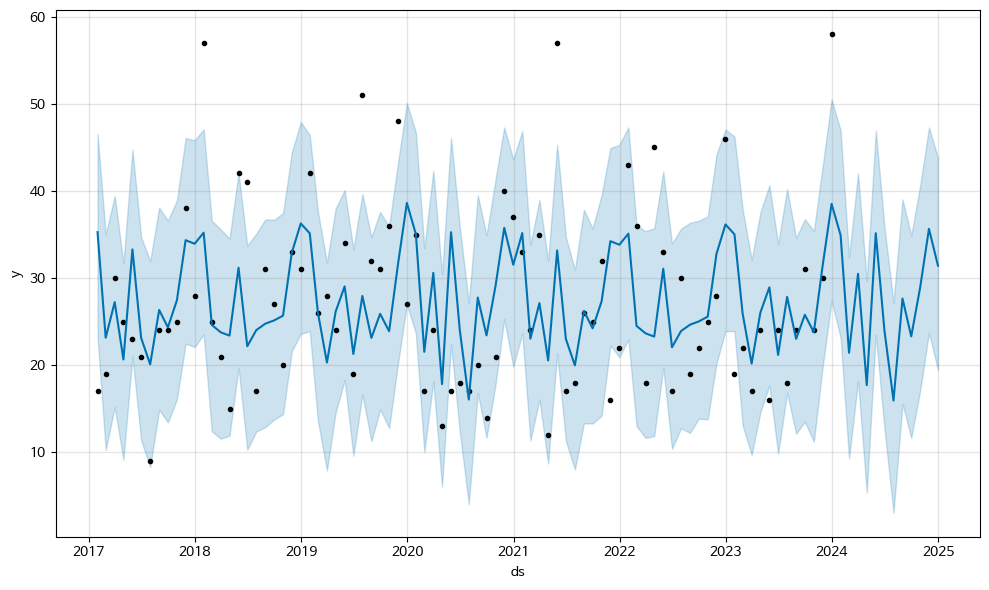

In [26]:
fig1 = m.plot(forecast)

### If you want to see the forecast components, you can use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


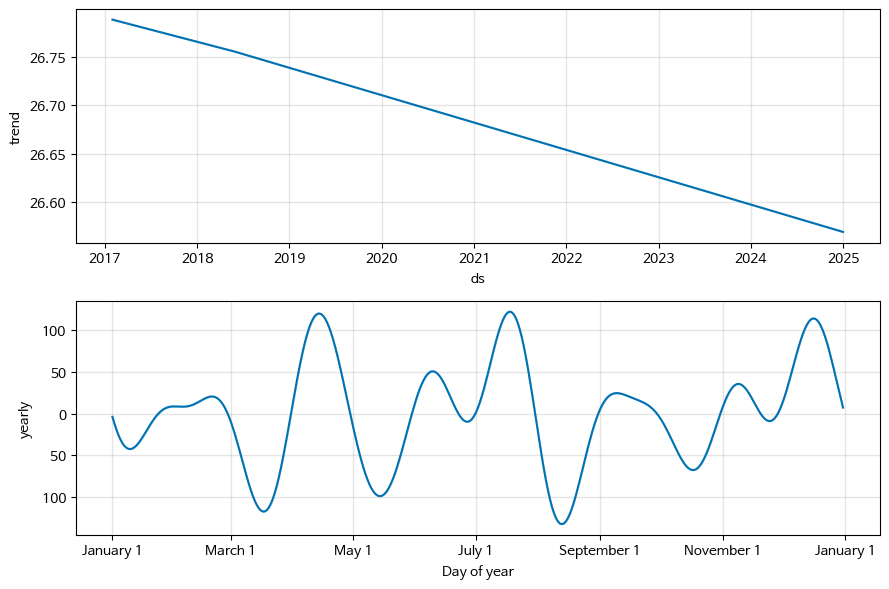

In [27]:
fig2 = m.plot_components(forecast)

### An interactive figure of the forecast and components can be created with plotly

In [28]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m,forecast)

### By default, Prophet uses a linear model for its forecast. When forecasting growth, there is usually some maximum achievable point: total market size, total population size, etc. This is called the carrying capacity, and the forecast should saturate at this point.

### We must specify the carrying capacity in a column cap. Here we will assume a particular value, but this would usually be set using data or expertise about the market size.
### The important things to note are that cap must be specified for every row in the dataframe, and that it does not have to be constant. If the market size is growing, then cap can be an increasing sequence.

In [29]:
df['cap'] = 50
df

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명),y,ds,cap
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13,17,2017-01-31,50
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17,19,2017-02-28,50
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24,30,2017-03-31,50
3,2017-04-30,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22,25,2017-04-30,50
4,2017-05-31,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18,23,2017-05-31,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2023-08-31,450,390,2,40,922,1083718,"458,213","703,036",24,0,24,24,2023-08-31,50
80,2023-09-30,427,373,8,35,"1,321",936333,"462,555","725,792",31,2,29,31,2023-09-30,50
81,2023-10-31,418,370,10,35,"1,012",1189566,"325,443","446,142",24,2,22,24,2023-10-31,50
82,2023-11-30,456,324,5,39,"4,498",2333341,"590,805","806,901",30,4,26,30,2023-11-30,50


In [30]:
# We then fit the model as before, except pass in an additional argument to specify logistic growth:
m = Prophet(growth='logistic')
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/5z0hzjat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/00vx3g2t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90100', 'data', 'file=/tmp/tmp5ze_y_8y/5z0hzjat.json', 'init=/tmp/tmp5ze_y_8y/00vx3g2t.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modelxmrh36y8/prophet_model-20240324031916.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


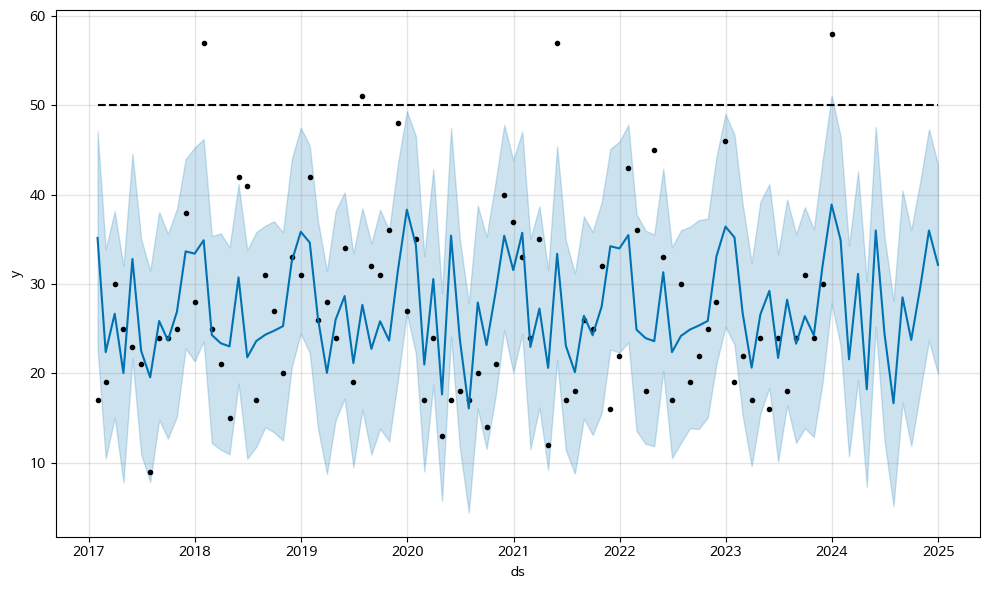

In [31]:
future = m.make_future_dataframe(periods=12,freq='M')
future['cap'] = 50
fcst = m.predict(future)
fig = m.plot(fcst)

### The logistic function has an implicit minimum of 0, and will saturate at 0 the same way that it saturates at the capacity. It is possible to also specify a different saturating minimum.

### Saturating Minimum
### The logistic growth model can also handle a saturating minimum, which is specified with a column floor in the same way as the cap column specifies the maximum:

In [32]:
# 합치기
df = pd.concat([df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023],axis=0)
df.reset_index(drop=True,inplace=True)
df.head(15)

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2017-01-01,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13
1,2017-02-01,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17
2,2017-03-01,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24
3,2017-04-01,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22
4,2017-05-01,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18
5,2017-06-01,507,458,11,38,"45,101",926051,"317,749","608,302",21,4,17
6,2017-07-01,509,459,6,44,947,833273,"370,841","462,432",9,0,9
7,2017-08-01,480,433,6,41,"1,251",1061597,"402,834","658,763",24,0,24
8,2017-09-01,525,464,12,49,"1,389",1434617,"403,677","1,030,940",24,2,22
9,2017-10-01,488,437,14,37,"1,501",1239319,"588,466","650,853",25,2,23


In [33]:
df['연도'] = pd.to_datetime(df['연도'], format='%Y-%m')
df['연도']

0    2017-01-01
1    2017-02-01
2    2017-03-01
3    2017-04-01
4    2017-05-01
        ...    
79   2023-08-01
80   2023-09-01
81   2023-10-01
82   2023-11-01
83   2023-12-01
Name: 연도, Length: 84, dtype: datetime64[ns]

In [34]:
df['연도'] = df['연도'].dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)
df

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명)
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24
3,2017-04-30,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22
4,2017-05-31,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2023-08-31,450,390,2,40,922,1083718,"458,213","703,036",24,0,24
80,2023-09-30,427,373,8,35,"1,321",936333,"462,555","725,792",31,2,29
81,2023-10-31,418,370,10,35,"1,012",1189566,"325,443","446,142",24,2,22
82,2023-11-30,456,324,5,39,"4,498",2333341,"590,805","806,901",30,4,26


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   연도         84 non-null     datetime64[ns]
 1   화재총합(건)    84 non-null     int64         
 2   실화(건)      84 non-null     int64         
 3   방화(건)      84 non-null     int64         
 4   기타(건)      84 non-null     int64         
 5   소실면적(m²)   84 non-null     object        
 6   피해액총합(천원)  84 non-null     int64         
 7   부동산피해(천원)  84 non-null     object        
 8   동산피해(천원)   84 non-null     object        
 9   인명피해합(명)   84 non-null     int64         
 10  사망총합(명)    84 non-null     int64         
 11  부상총합(명)    84 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(3)
memory usage: 8.0+ KB


In [36]:
df['y'] = df['인명피해합(명)']
df['ds'] = df['연도']
df.head(3)

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명),y,ds
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13,17,2017-01-31
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17,19,2017-02-28
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24,30,2017-03-31


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/kttalid_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/7ejw_w5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44106', 'data', 'file=/tmp/tmp5ze_y_8y/kttalid_.json', 'init=/tmp/tmp5ze_y_8y/7ejw_w5e.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model7q3o_xow/prophet_model-20240324031917.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


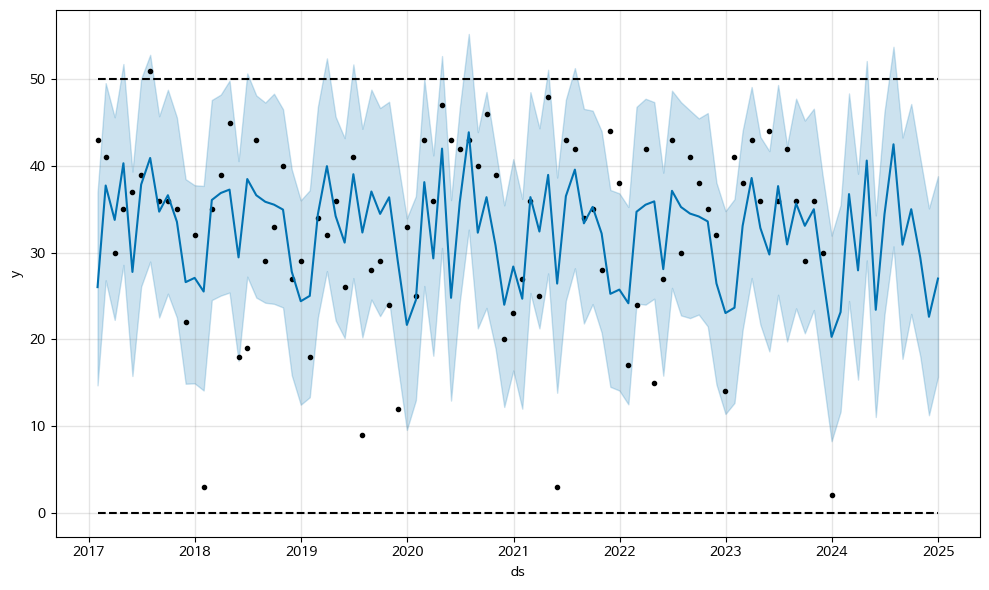

In [37]:
df['y'] = 60 - df['y']
df['cap'] = 50
df['floor'] = 0
future['cap'] = 50
future['floor'] = 0
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

### To use a logistic growth trend with a saturating minimum, a maximum capacity must also be specified.
### 이 말은 로지스틱 성장 모델을 사용할 때 종속 변수의 최소값 뿐만 아니라 최대값도 함께 고려해야 한다는 것을 의미합니다. 최소값은 floor 열을 사용하여 지정하고, 최대값은 cap 열을 사용하여 지정합니다. 이렇게 함으로써 모델은 종속 변수가 일정 범위 내에서 포화되는 특성을 고려하여 데이터를 더 정확하게 모델링할 수 있습니다. 이러한 방식으로 로지스틱 성장 모델을 구성하면 데이터의 특성을 보다 정확하게 모델링할 수 있으며, 결과적으로 더 신뢰할 수 있는 예측을 얻을 수 있습니다.

###  if you wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use.
### By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series

### The number of potential changepoints can be set using the argument n_changepoints, but this is better tuned by adjusting the regularization. The locations of the signification changepoints can be visualized with

In [38]:
# 합치기
df = pd.concat([df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023],axis=0)
df.reset_index(drop=True,inplace=True)

In [39]:
df['연도'] = pd.to_datetime(df['연도'], format='%Y-%m')
df['연도'] = df['연도'].dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [40]:
df['y'] = df['인명피해합(명)']
df['ds'] = df['연도']
df

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명),y,ds
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13,17,2017-01-31
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17,19,2017-02-28
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24,30,2017-03-31
3,2017-04-30,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22,25,2017-04-30
4,2017-05-31,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18,23,2017-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2023-08-31,450,390,2,40,922,1083718,"458,213","703,036",24,0,24,24,2023-08-31
80,2023-09-30,427,373,8,35,"1,321",936333,"462,555","725,792",31,2,29,31,2023-09-30
81,2023-10-31,418,370,10,35,"1,012",1189566,"325,443","446,142",24,2,22,24,2023-10-31
82,2023-11-30,456,324,5,39,"4,498",2333341,"590,805","806,901",30,4,26,30,2023-11-30


In [41]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/_95_3l00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/uyj3pw53.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53237', 'data', 'file=/tmp/tmp5ze_y_8y/_95_3l00.json', 'init=/tmp/tmp5ze_y_8y/uyj3pw53.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model4xatfnra/prophet_model-20240324031918.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
future = m.make_future_dataframe(periods=12,freq='M')
forecast = m.predict(future)
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-31,26.788518,23.185129,46.187034,26.788518,26.788518,8.481418,8.481418,8.481418,8.481418,8.481418,8.481418,0.0,0.0,0.0,35.269936
1,2017-02-28,26.786610,10.719617,33.940271,26.786610,26.786610,-3.622588,-3.622588,-3.622588,-3.622588,-3.622588,-3.622588,0.0,0.0,0.0,23.164022
2,2017-03-31,26.784498,15.256771,39.160280,26.784498,26.784498,0.458246,0.458246,0.458246,0.458246,0.458246,0.458246,0.0,0.0,0.0,27.242744


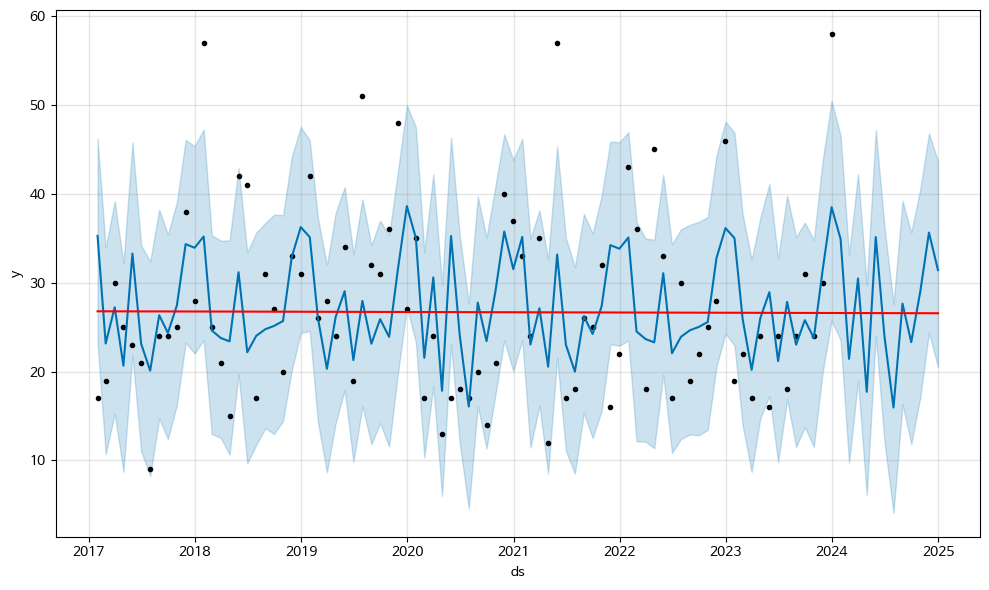

In [43]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

### By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series. This default works in many situations but not all, and can be changed using the changepoint_range argument. For example, m = Prophet(changepoint_range=0.9) in Python or m <- prophet(changepoint.range = 0.9) in R will place potential changepoints in the first 90% of the time series.

### Adjusting trend flexibility
If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible

In [44]:
df

,연도,화재총합(건),실화(건),방화(건),기타(건),소실면적(m²),피해액총합(천원),부동산피해(천원),동산피해(천원),인명피해합(명),사망총합(명),부상총합(명),y,ds
0,2017-01-31,513,452,20,41,2364,1322875,"453,622","869,253",17,4,13,17,2017-01-31
1,2017-02-28,442,379,12,51,2349,1144247,"471,809","672,438",19,2,17,19,2017-02-28
2,2017-03-31,522,475,11,36,"12,432",2248904,"1,417,807","831,097",30,6,24,30,2017-03-31
3,2017-04-30,480,425,9,46,"6,708",952204,"324,456","627,748",25,3,22,25,2017-04-30
4,2017-05-31,525,470,10,45,"4,146",1218663,"433,599","785,064",23,5,18,23,2017-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2023-08-31,450,390,2,40,922,1083718,"458,213","703,036",24,0,24,24,2023-08-31
80,2023-09-30,427,373,8,35,"1,321",936333,"462,555","725,792",31,2,29,31,2023-09-30
81,2023-10-31,418,370,10,35,"1,012",1189566,"325,443","446,142",24,2,22,24,2023-10-31
82,2023-11-30,456,324,5,39,"4,498",2333341,"590,805","806,901",30,4,26,30,2023-11-30


In [45]:
future

,ds
0,2017-01-31
1,2017-02-28
2,2017-03-31
3,2017-04-30
4,2017-05-31
...,...
91,2024-08-31
92,2024-09-30
93,2024-10-31
94,2024-11-30


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/d77a6vnv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/q5dhmm8h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92425', 'data', 'file=/tmp/tmp5ze_y_8y/d77a6vnv.json', 'init=/tmp/tmp5ze_y_8y/q5dhmm8h.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model3fjt564y/prophet_model-20240324031919.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


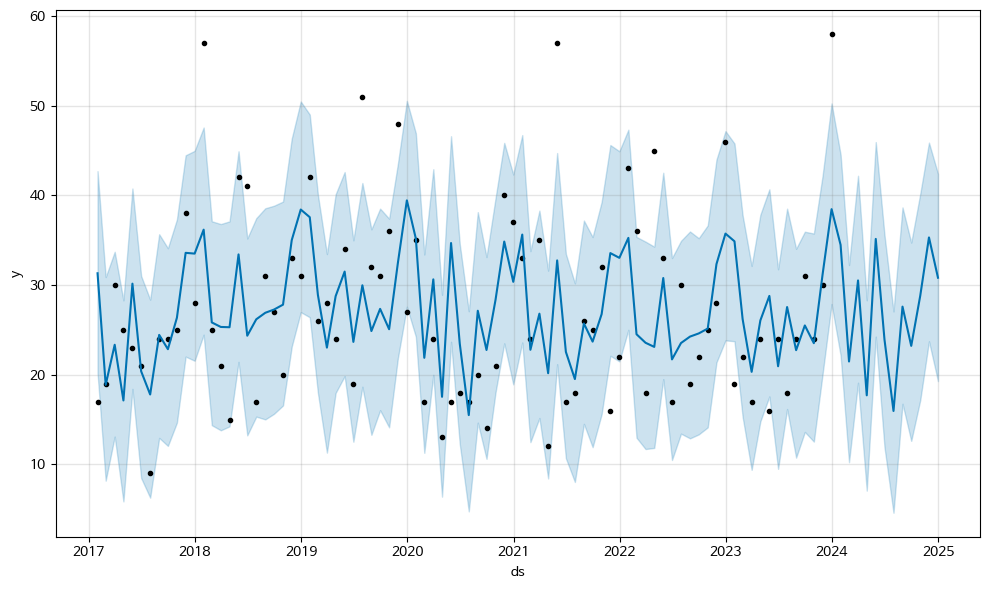

In [46]:
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-31,21.655460,20.179182,42.700506,21.655460,21.655460,9.656447,9.656447,9.656447,9.656447,9.656447,9.656447,0.0,0.0,0.0,31.311907
1,2017-02-28,22.065401,8.180053,30.887048,22.065401,22.065401,-3.195005,-3.195005,-3.195005,-3.195005,-3.195005,-3.195005,0.0,0.0,0.0,18.870396
2,2017-03-31,22.519264,13.099689,33.707011,22.519264,22.519264,0.820421,0.820421,0.820421,0.820421,0.820421,0.820421,0.0,0.0,0.0,23.339684
3,2017-04-30,22.958486,5.867398,28.290150,22.958486,22.958486,-5.831221,-5.831221,-5.831221,-5.831221,-5.831221,-5.831221,0.0,0.0,0.0,17.127265
4,2017-05-31,23.412349,18.417668,40.763360,23.412349,23.412349,6.740346,6.740346,6.740346,6.740346,6.740346,6.740346,0.0,0.0,0.0,30.152695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-31,26.378962,16.759366,38.652092,25.926480,26.840824,1.210483,1.210483,1.210483,1.210483,1.210483,1.210483,0.0,0.0,0.0,27.589445
92,2024-09-30,26.388398,12.618076,34.729849,25.840365,26.959726,-3.174428,-3.174428,-3.174428,-3.174428,-3.174428,-3.174428,0.0,0.0,0.0,23.213969
93,2024-10-31,26.398148,17.163416,40.171750,25.765719,27.078035,2.407031,2.407031,2.407031,2.407031,2.407031,2.407031,0.0,0.0,0.0,28.805179
94,2024-11-30,26.407583,23.724386,45.881221,25.653829,27.196094,8.901000,8.901000,8.901000,8.901000,8.901000,8.901000,0.0,0.0,0.0,35.308584


### Decreasing it will make the trend less flexible

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/j87g6gbt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/3r35bf1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70674', 'data', 'file=/tmp/tmp5ze_y_8y/j87g6gbt.json', 'init=/tmp/tmp5ze_y_8y/3r35bf1_.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model_gloyrlj/prophet_model-20240324031921.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


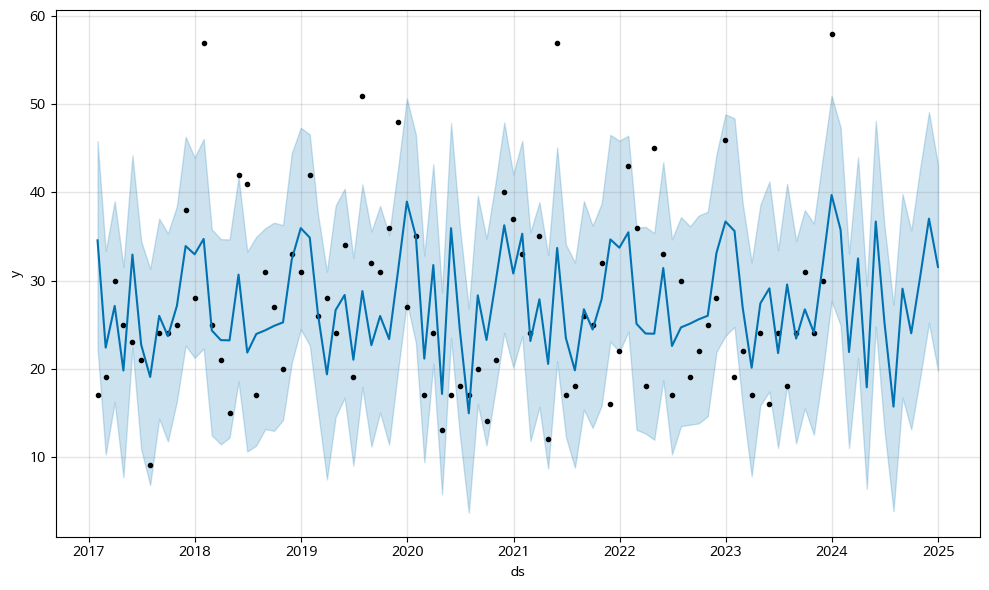

In [48]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

In [49]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-31,25.996180,22.281473,45.833141,25.996180,25.996180,8.563299,8.563299,8.563299,8.563299,8.563299,8.563299,0.0,0.0,0.0,34.559479
1,2017-02-28,26.010587,10.229951,33.331556,26.010587,26.010587,-3.628111,-3.628111,-3.628111,-3.628111,-3.628111,-3.628111,0.0,0.0,0.0,22.382476
2,2017-03-31,26.026537,16.206307,39.005836,26.026537,26.026537,1.092030,1.092030,1.092030,1.092030,1.092030,1.092030,0.0,0.0,0.0,27.118568
3,2017-04-30,26.041973,7.662182,31.574088,26.041973,26.041973,-6.264658,-6.264658,-6.264658,-6.264658,-6.264658,-6.264658,0.0,0.0,0.0,19.777315
4,2017-05-31,26.057924,22.409113,44.210388,26.057924,26.057924,6.887266,6.887266,6.887266,6.887266,6.887266,6.887266,0.0,0.0,0.0,32.945190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2024-08-31,27.420920,16.698077,39.817241,27.420920,27.420920,1.646836,1.646836,1.646836,1.646836,1.646836,1.646836,0.0,0.0,0.0,29.067757
92,2024-09-30,27.436356,13.094792,35.658472,27.436356,27.436356,-3.433846,-3.433846,-3.433846,-3.433846,-3.433846,-3.433846,0.0,0.0,0.0,24.002510
93,2024-10-31,27.452307,19.013074,42.811435,27.452306,27.452307,3.027606,3.027606,3.027606,3.027606,3.027606,3.027606,0.0,0.0,0.0,30.479912
94,2024-11-30,27.467743,25.182695,49.117827,27.467742,27.467743,9.556026,9.556026,9.556026,9.556026,9.556026,9.556026,0.0,0.0,0.0,37.023769


### When visualizing the forecast, this parameter can be adjusted as needed if the trend seems to be over- or under-fit.

### Specifying the locations of the changepoints
### If you wish, rather than using automatic changepoint detection you can manually specify the locations of potential changepoints with the changepoints argument. Slope changes will then be allowed only at these points, with the same sparse regularization as before. One could, for instance, create a grid of points as is done automatically, but then augment that grid with some specific dates that are known to be likely to have changes. As another example, the changepoints could be entirely limited to a small set of dates, as is done here

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/tu8m0kmc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/sb3c97nk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76846', 'data', 'file=/tmp/tmp5ze_y_8y/tu8m0kmc.json', 'init=/tmp/tmp5ze_y_8y/sb3c97nk.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modeleft2s9gl/prophet_model-20240324031923.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


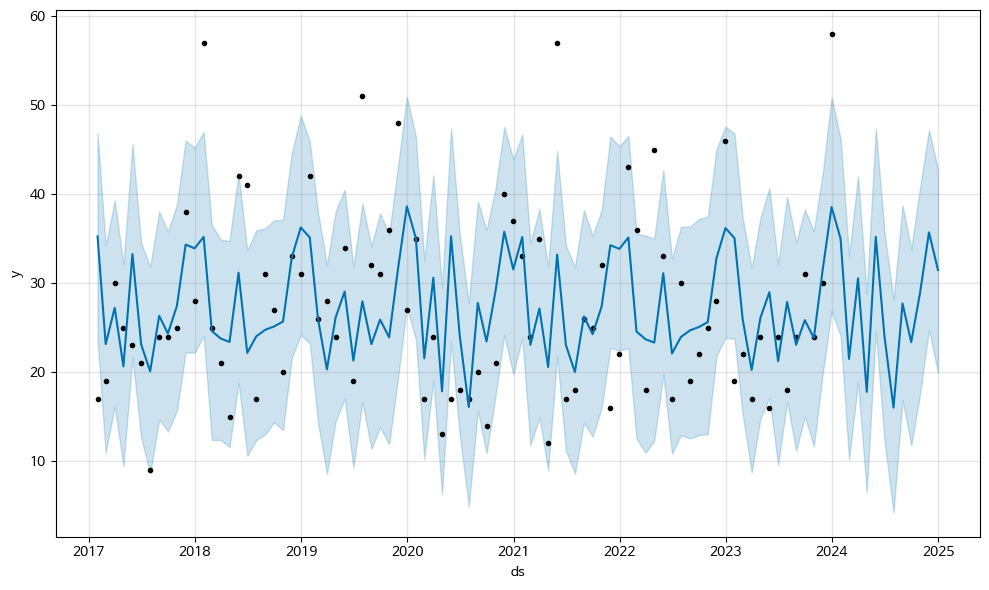

In [50]:
m = Prophet(changepoints=['2020-01-31'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)

### 이 장에서는 임시로 다른 데이터셋을 사용한다. 원래 내가 사용하던 데이터는 각 월의 마지막날이 값으로 들어있기 때문에 휴일 매개변수를 적용할수 없다.

# Seasonality, Holiday Effects, And Regressors

## Modeling Holidays and Special Events
If you have holidays or other recurring events that you’d like to model, you must create a dataframe for them. It has two columns (holiday and ds) and a row for each occurrence of the holiday. It must include all occurrences of the holiday, both in the past (back as far as the historical data go) and in the future (out as far as the forecast is being made). If they won’t repeat in the future, Prophet will model them and then not include them in the forecast.

You can also include columns lower_window and upper_window which extend the holiday out to [lower_window, upper_window] days around the date. For instance, if you wanted to include Christmas Eve in addition to Christmas you’d include lower_window=-1,upper_window=0. If you wanted to use Black Friday in addition to Thanksgiving, you’d include lower_window=0,upper_window=1. You can also include a column prior_scale to set the prior scale separately for each holiday, as described below.
# Here we create a dataframe that includes the dates of all of Peyton Manning’s playoff appearances:

In [51]:
df_manning = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df_manning.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [52]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

### Above we have included the superbowl days as both playoff games and superbowl games. This means that the superbowl effect will be an additional additive bonus on top of the playoff effect.

Once the table is created, holiday effects are included in the forecast by passing them in with the holidays argument. Here we do it with the Peyton Manning data from the Quickstart:

In [53]:
m_manning = Prophet()
m_manning.fit(df_manning)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/xfv_rhc7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/vusld2l6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54028', 'data', 'file=/tmp/tmp5ze_y_8y/xfv_rhc7.json', 'init=/tmp/tmp5ze_y_8y/vusld2l6.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modelsv7dkoe_/prophet_model-20240324031924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
future_manning = m_manning.make_future_dataframe(periods=365)
future_manning.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [55]:
m_manning = Prophet(holidays=holidays)
forecast_manning = m_manning.fit(df_manning).predict(future_manning)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/x4zedmuu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/hg41g7io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62529', 'data', 'file=/tmp/tmp5ze_y_8y/x4zedmuu.json', 'init=/tmp/tmp5ze_y_8y/hg41g7io.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modelrpdkbwl6/prophet_model-20240324031925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [56]:
forecast_manning[(forecast_manning['playoff']+forecast_manning['superbowl']).abs()>0][['ds','playoff','superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.217847,1.200633
2191,2014-02-03,1.898839,1.455819
2532,2015-01-11,1.217847,0.000000
2533,2015-01-12,1.898839,0.000000
2901,2016-01-17,1.217847,0.000000
2902,2016-01-18,1.898839,0.000000
2908,2016-01-24,1.217847,0.000000
2909,2016-01-25,1.898839,0.000000
2922,2016-02-07,1.217847,1.200633
2923,2016-02-08,1.898839,1.455819


### The holiday effects will also show up in the components plot, where we see that there is a spike on the days around playoff appearances, with an especially large spike for the superbowl:

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



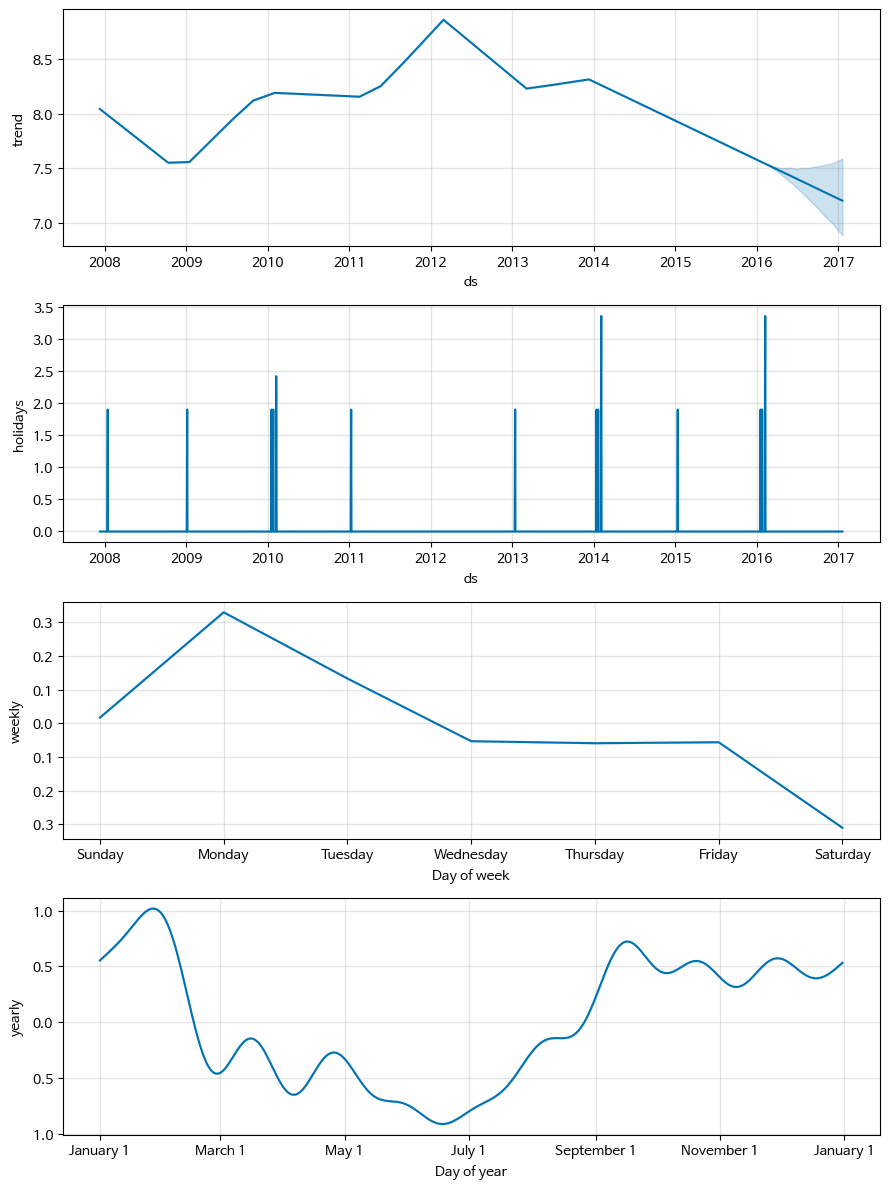

In [57]:
fig = m_manning.plot_components(forecast_manning)

### Individual holidays can be plotted using the plot_forecast_component function (imported from prophet.plot in Python) like plot_forecast_component(m, forecast, 'superbowl') to plot just the superbowl holiday component.

### Built-in Country Holidays
You can use a built-in collection of country-specific holidays using the add_country_holidays method (Python) or function (R). The name of the country is specified, and then major holidays for that country will be included in addition to any holidays that are specified via the holidays argument described above:

In [58]:
m_manning = Prophet(holidays=holidays)
m_manning.add_country_holidays(country_name='US')
m_manning.fit(df_manning)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/j1q56w8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/hnncd7yf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69193', 'data', 'file=/tmp/tmp5ze_y_8y/j1q56w8m.json', 'init=/tmp/tmp5ze_y_8y/hnncd7yf.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modely1mgh3pm/prophet_model-20240324031929.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### You can see which holidays were included by looking at the train_holiday_names (Python) or train.holiday.names (R) attribute of the model:

In [59]:
m_manning.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Veterans Day
7                    Thanksgiving
8                   Christmas Day
9        Christmas Day (observed)
10     Martin Luther King Jr. Day
11          Washington's Birthday
12                   Columbus Day
13        Veterans Day (observed)
14    Independence Day (observed)
15      New Year's Day (observed)
dtype: object

# the country-level holidays will then show up in the components plot:

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



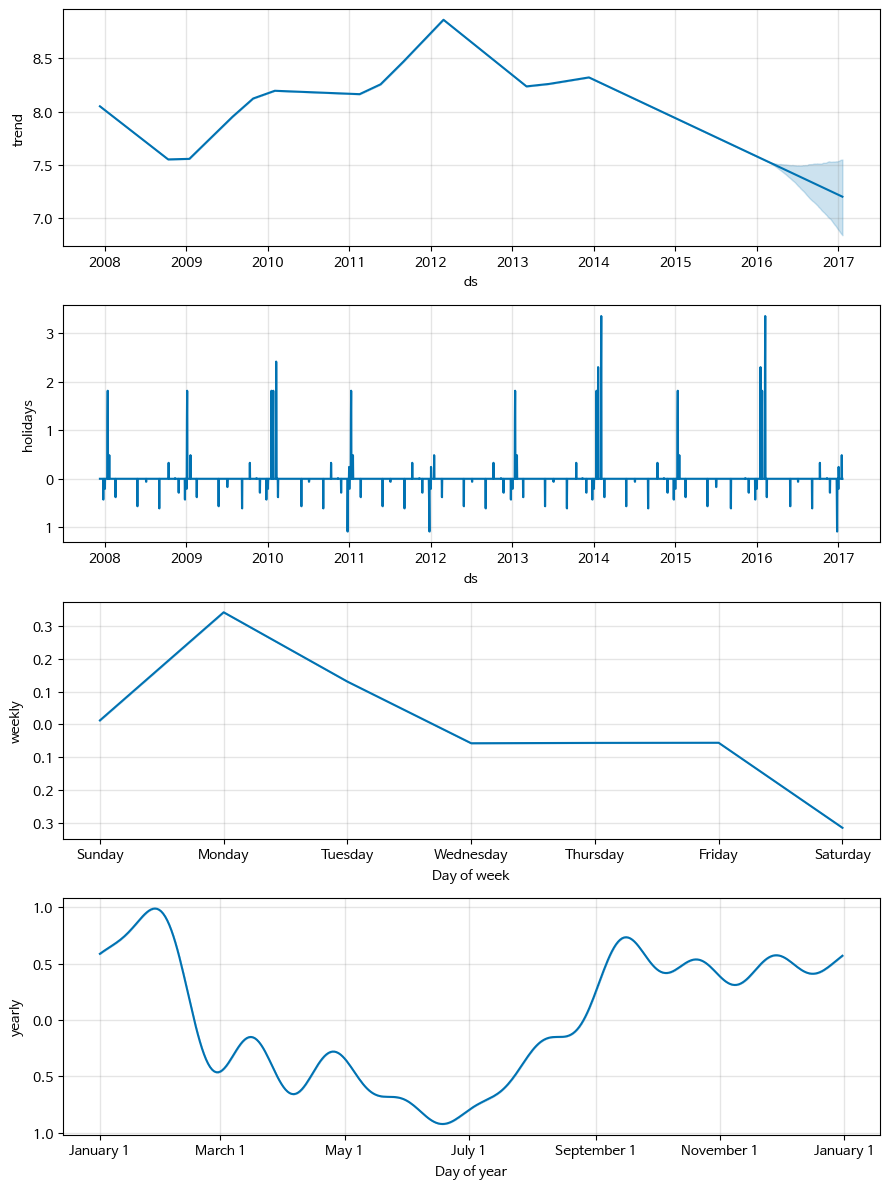

In [60]:
forecast_manning = m_manning.predict(future_manning)
fig = m_manning.plot_components(forecast_manning)

### Holidays for subdivisions (Python)
We can use the utility function make_holidays_df to easily create custom holidays DataFrames, e.g. for certain states, using data from the holidays package. This can be passed directly to the Prophet() constructor.

In [61]:
from prophet.make_holidays import make_holidays_df

nsw_holidays = make_holidays_df(
    year_list = [2019+i for i in range(10)],country='AU',province='NSW'
)
nsw_holidays.head(n=10)

,ds,holiday
0,2019-01-01,New Year's Day
1,2019-04-19,Good Friday
2,2019-04-22,Easter Monday
3,2019-12-25,Christmas Day
4,2019-01-26,Australia Day
5,2019-01-28,Australia Day (observed)
6,2019-04-25,Anzac Day
7,2019-12-26,Boxing Day
8,2019-04-20,Easter Saturday
9,2019-04-21,Easter Sunday


In [62]:
from prophet import Prophet

m_nsw = Prophet(holidays=nsw_holidays)

### Fourier Order for Seasonalities
Seasonalities are estimated using a partial Fourier sum. See the paper for complete details, and this figure on Wikipedia for an illustration of how a partial Fourier sum can approximate an arbitrary periodic signal. The number of terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change. To illustrate this, consider the Peyton Manning data from the Quickstart. The default Fourier order for yearly seasonality is 10, which produces this fit:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/tm7bc5xu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/uosejpu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66700', 'data', 'file=/tmp/tmp5ze_y_8y/tm7bc5xu.json', 'init=/tmp/tmp5ze_y_8y/uosejpu9.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modeltknlbkyw/prophet_model-20240324031939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/

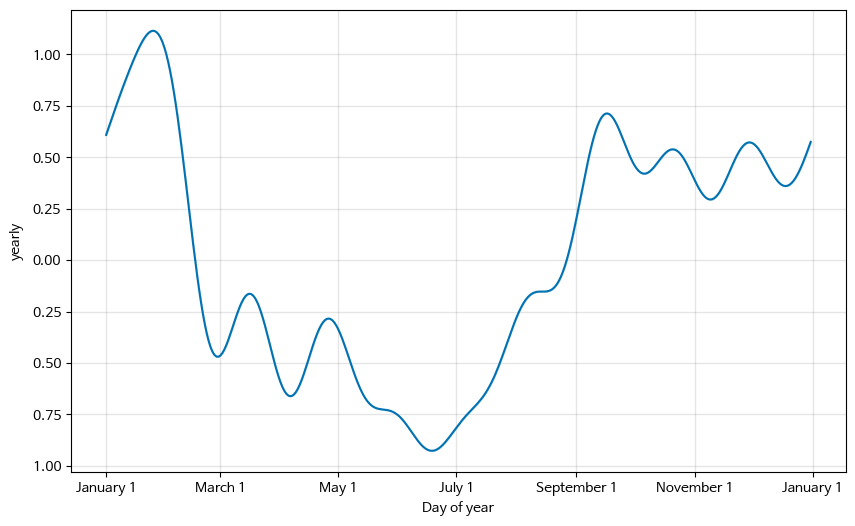

In [63]:
from prophet.plot import plot_yearly
m_manning = Prophet().fit(df_manning)
a = plot_yearly(m_manning)

### The default values are often appropriate, but they can be increased when the seasonality needs to fit higher-frequency changes, and generally be less smooth. The Fourier order can be specified for each built-in seasonality when instantiating the model, here it is increased to 20:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/vehb5mxg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/top6grqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79961', 'data', 'file=/tmp/tmp5ze_y_8y/vehb5mxg.json', 'init=/tmp/tmp5ze_y_8y/top6grqs.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modelif4ysmtr/prophet_model-20240324031942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/

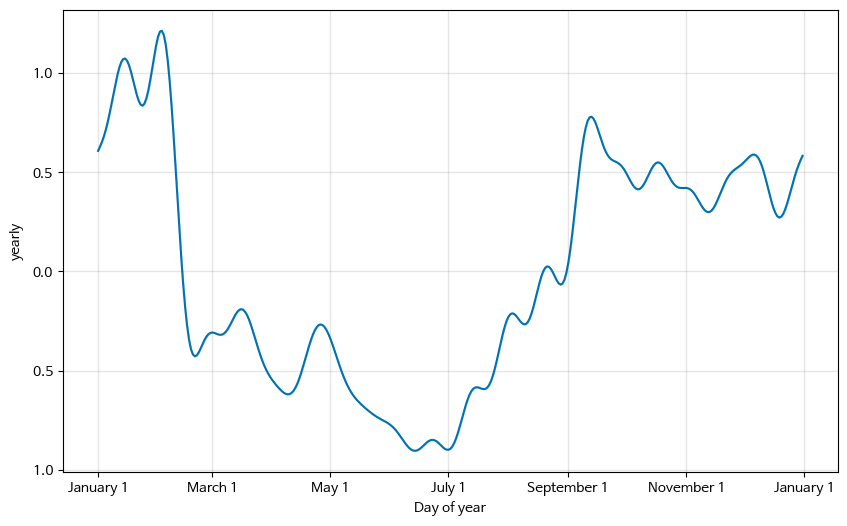

In [64]:
from prophet.plot import plot_yearly
m_manning = Prophet(yearly_seasonality=20).fit(df_manning)
a = plot_yearly(m_manning)

### Increasing the number of Fourier terms allows the seasonality to fit faster changing cycles, but can also lead to overfitting: N Fourier terms corresponds to 2N variables used for modeling the cycle

### Specifying Custom Seasonalities
Prophet will by default fit weekly and yearly seasonalities, if the time series is more than two cycles long. It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly) using the add_seasonality method (Python) or function (R).

The inputs to this function are a name, the period of the seasonality in days, and the Fourier order for the seasonality. For reference, by default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality. An optional input to add_seasonality is the prior scale for that seasonal component - this is discussed below.

As an example, here we fit the Peyton Manning data from the Quickstart, but replace the weekly seasonality with monthly seasonality. The monthly seasonality then will appear in the components plot:

### 이 부분만 본래의 데이터를 사용해보자

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/lulnsak3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/jodb612d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37241', 'data', 'file=/tmp/tmp5ze_y_8y/lulnsak3.json', 'init=/tmp/tmp5ze_y_8y/jodb612d.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modelcsh2gpuk/prophet_model-20240324031945.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local

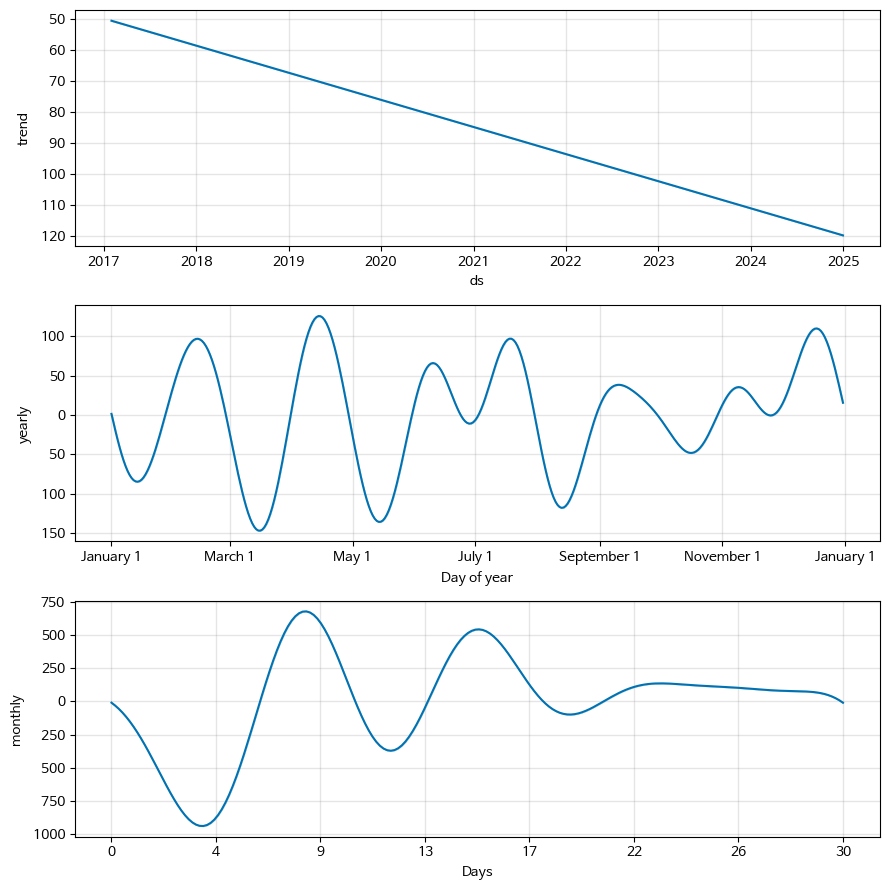

In [65]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly',period=30.5,fourier_order=5) #period 계절성의 주기가 포함된 일 수/ fourier_order 월별 계절성의 변화를 적합시키는데 사용되는 변수 수가 늘어남
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)

### Seasonalities that depend on other factors
In some instances the seasonality may depend on other factors, such as a weekly seasonal pattern that is different during the summer than it is during the rest of the year, or a daily seasonal pattern that is different on weekends vs. on weekdays. These types of seasonalities can be modeled using conditional seasonalities.

Consider the Peyton Manning example from the Quickstart. The default weekly seasonality assumes that the pattern of weekly seasonality is the same throughout the year, but we’d expect the pattern of weekly seasonality to be different during the on-season (when there are games every Sunday) and the off-season. We can use conditional seasonalities to construct separate on-season and off-season weekly seasonalities.

First we add a boolean column to the dataframe that indicates whether each date is during the on-season or the off-season:

In [66]:
def is_nfl_season(ds):
  date = pd.to_datetime(ds)
  return (date.month>8 or date.month<2)

df_manning['on_season'] = df_manning['ds'].apply(is_nfl_season)
df_manning['off_season'] = ~df_manning['ds'].apply(is_nfl_season)

In [67]:
df_manning

,ds,y,on_season,off_season
0,2007-12-10,9.590761,True,False
1,2007-12-11,8.519590,True,False
2,2007-12-12,8.183677,True,False
3,2007-12-13,8.072467,True,False
4,2007-12-14,7.893572,True,False
...,...,...,...,...
2900,2016-01-16,7.817223,True,False
2901,2016-01-17,9.273878,True,False
2902,2016-01-18,10.333775,True,False
2903,2016-01-19,9.125871,True,False


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/x7cno1su.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/ymynw86q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37567', 'data', 'file=/tmp/tmp5ze_y_8y/x7cno1su.json', 'init=/tmp/tmp5ze_y_8y/ymynw86q.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model8ecvua01/prophet_model-20240324033019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:30:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:30:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/

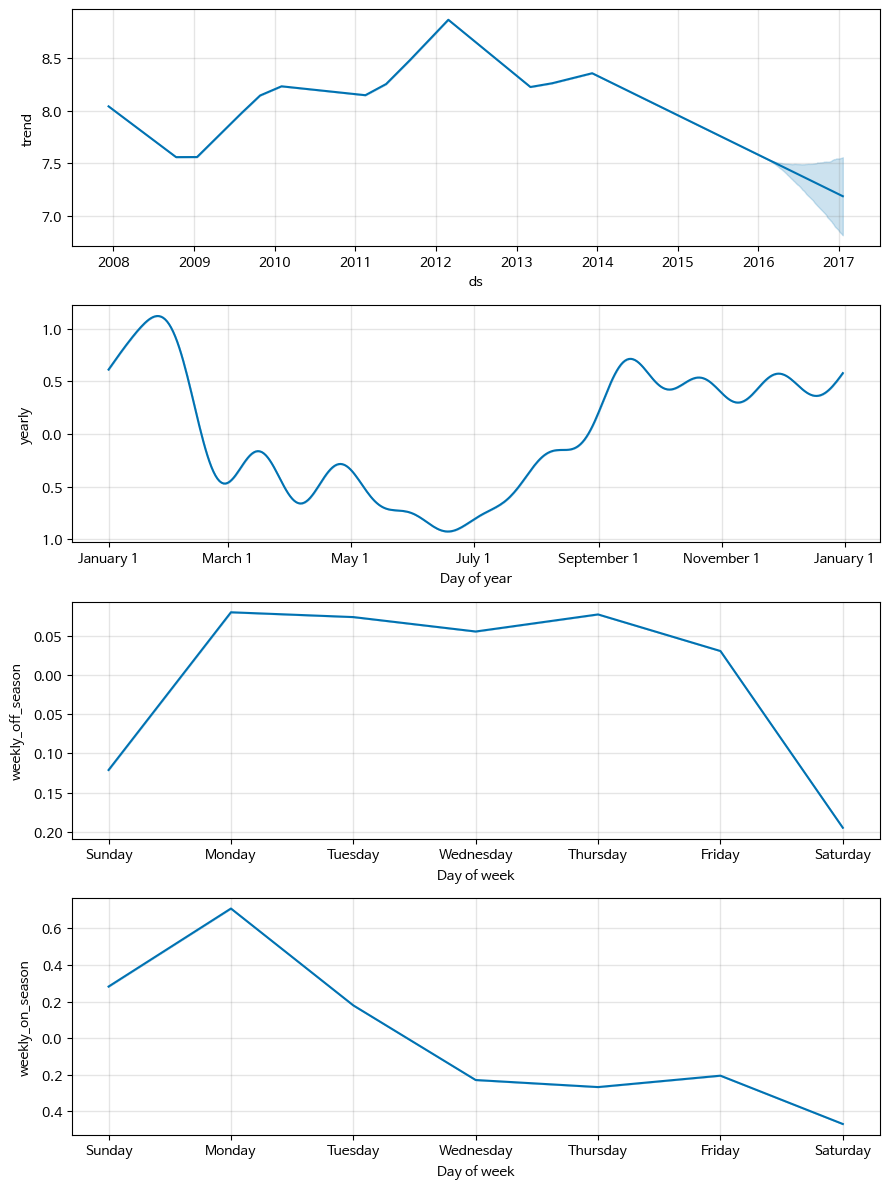

In [69]:
m_manning = Prophet(weekly_seasonality=False)
m_manning.add_seasonality(name='weekly_on_season',period=7,fourier_order=3,condition_name='on_season')
m_manning.add_seasonality(name='weekly_off_season',period=7,fourier_order=3,condition_name='off_season')

future_manning['on_season'] = future_manning['ds'].apply(is_nfl_season)
future_manning['off_season'] = ~future_manning['ds'].apply(is_nfl_season)
forecast_manning = m_manning.fit(df_manning).predict(future_manning)
fig = m_manning.plot_components(forecast_manning)

### Both of the seasonalities now show up in the components plots above. We can see that during the on-season when games are played every Sunday, there are large increases on Sunday and Monday that are completely absent during the off-season.



### Prior scale for holidays and seasonality
If you find that the holidays are overfitting, you can adjust their prior scale to smooth them using the parameter holidays_prior_scale. By default this parameter is 10, which provides very little regularization. Reducing this parameter dampens holiday effects:

In [70]:
m_manning = Prophet(holidays=holidays,holidays_prior_scale=0.05).fit(df_manning)
forecast_manning = m_manning.predict(future_manning)
forecast_manning[(forecast_manning['playoff']+forecast_manning['superbowl']).abs()>0][['ds','playoff','superbowl']][-10:]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/ejxaro48.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/ecc0bdrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7606', 'data', 'file=/tmp/tmp5ze_y_8y/ejxaro48.json', 'init=/tmp/tmp5ze_y_8y/ecc0bdrn.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_modeldj5wghqf/prophet_model-20240324033431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:34:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:34:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,playoff,superbowl
2190,2014-02-02,1.206360,0.962841
2191,2014-02-03,1.851229,0.997293
2532,2015-01-11,1.206360,0.000000
2533,2015-01-12,1.851229,0.000000
2901,2016-01-17,1.206360,0.000000
2902,2016-01-18,1.851229,0.000000
2908,2016-01-24,1.206360,0.000000
2909,2016-01-25,1.851229,0.000000
2922,2016-02-07,1.206360,0.962841
2923,2016-02-08,1.851229,0.997293


### The magnitude of the holiday effect has been reduced compared to before, especially for superbowls, which had the fewest observations. There is a parameter seasonality_prior_scale which similarly adjusts the extent to which the seasonality model will fit the data.

Prior scales can be set separately for individual holidays by including a column prior_scale in the holidays dataframe. Prior scales for individual seasonalities can be passed as an argument to add_seasonality. For instance, the prior scale for just weekly seasonality can be set using:

In [71]:
m_manning = Prophet()
m_manning.add_seasonality(name='weekly',period=7,fourier_order=3,prior_scale=0.1)

### Additional regressors
Additional regressors can be added to the linear part of the model using the add_regressor method or function. A column with the regressor value will need to be present in both the fitting and prediction dataframes. For example, we can add an additional effect on Sundays during the NFL season. On the components plot, this effect will show up in the ‘extra_regressors’ plot:

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/wtghnvxp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5ze_y_8y/dix5_bws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30539', 'data', 'file=/tmp/tmp5ze_y_8y/wtghnvxp.json', 'init=/tmp/tmp5ze_y_8y/dix5_bws.json', 'output', 'file=/tmp/tmp5ze_y_8y/prophet_model27x5bmp6/prophet_model-20240324034101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:41:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:196: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

/usr/local/

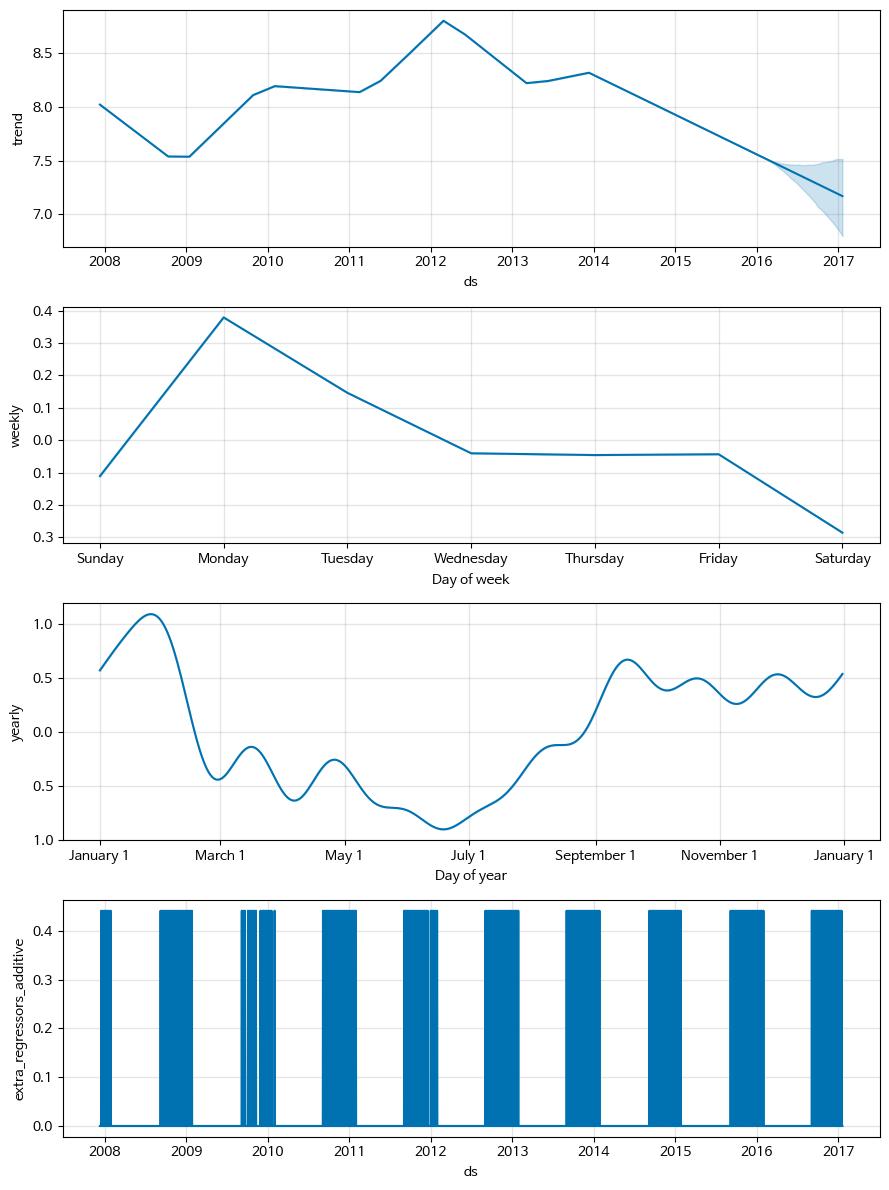

In [72]:
def nfl_sunday(ds):
  date = pd.to_datetime(ds)
  if date.weekday() == 6 and (date.month>8 or date.month<2):
    return 1
  else:
    return 0

df_manning['nfl_sunday'] = df_manning['ds'].apply(nfl_sunday)

m_manning = Prophet()
m_manning.add_regressor('nfl_sunday')
m_manning.fit(df_manning)

future_manning['nfl_sunday'] = future_manning['ds'].apply(nfl_sunday)
forecast_manning = m_manning.predict(future_manning)
fig = m_manning.plot_components(forecast_manning)

### Coefficients of additional regressors
To extract the beta coefficients of the extra regressors, use the utility function regressor_coefficients (from prophet.utilities import regressor_coefficients in Python, prophet::regressor_coefficients in R) on the fitted model. The estimated beta coefficient for each regressor roughly represents the increase in prediction value for a unit increase in the regressor value (note that the coefficients returned are always on the scale of the original data). If mcmc_samples is specified, a credible interval for each coefficient is also returned, which can help identify whether the regressor is meaningful to the model (a credible interval that includes the 0 value suggests the regressor is not meaningful).

### Prophet 공식문서에 대한 절반의 공부가 끝났다.
### Prophet_docs_study(2).ipynb부터는 공식문서에 나오는 데이터를 사용할 것이다.
### Prophet 모델을 공부하는 목적이 2024 서울시 월별 화재사고 현황을 예측하는 데 사용하려는 것이었다. 그러나 공식문서에서 사용하는 데이터와 시기가 맞지 않아
### 일단 공식문서 데이터로 공부하고 공부한 것을 프로젝트 데이터에 적용하기로 한다.